In [1]:
# import the necessary libraries

# For Data Analysis
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
Fraud_D = pd.read_excel('pattern.xlsx')

In [11]:
!pip install openpyxl
Fraud_D = pd.read_excel('pattern.xlsx', engine='openpyxl')



In [13]:
Fraud_D.columns= ["step", "type", "amount", "customer_starting_transaction", "bal_before_transaction", 
            "bal_after_transaction", "recipient_of_transaction", "bal_of_recepient_before_transaction", "bal_of_receipient_after_transaction", "fraud_transaction"]
# View data (to give you first five rows)
Fraud_D.head()

,step,type,amount,customer_starting_transaction,bal_before_transaction,bal_after_transaction,recipient_of_transaction,bal_of_recepient_before_transaction,bal_of_receipient_after_transaction,fraud_transaction
0,1,CASH_OUT,5000,CUST_001,15000,10000,REC_101,5000,10000,0
1,2,TRANSFER,10000,CUST_002,20000,10000,REC_102,8000,18000,1
2,3,DEPOSIT,7000,CUST_003,5000,12000,REC_103,3000,10000,0
3,4,PAYMENT,1500,CUST_004,6000,4500,REC_104,9000,10500,0
4,5,CASH_OUT,8000,CUST_005,12000,4000,REC_105,7000,15000,1


In [15]:
Fraud_D.tail()

,step,type,amount,customer_starting_transaction,bal_before_transaction,bal_after_transaction,recipient_of_transaction,bal_of_recepient_before_transaction,bal_of_receipient_after_transaction,fraud_transaction
15,16,TRANSFER,9000,CUST_016,15000,6000,REC_1016,4000,13000,0
16,17,PAYMENT,2500,CUST_017,8000,5500,REC_1017,9000,11500,0
17,18,CASH_OUT,11000,CUST_018,13000,2000,REC_1018,4000,15000,1
18,19,DEPOSIT,5000,CUST_019,4000,9000,REC_1019,3000,8000,0
19,20,TRANSFER,20000,CUST_020,30000,10000,REC_1020,5000,25000,1


In [17]:
Fraud_D.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   step                                 20 non-null     int64 
 1   type                                 20 non-null     object
 2   amount                               20 non-null     int64 
 3   customer_starting_transaction        20 non-null     object
 4   bal_before_transaction               20 non-null     int64 
 5   bal_after_transaction                20 non-null     int64 
 6   recipient_of_transaction             20 non-null     object
 7   bal_of_recepient_before_transaction  20 non-null     int64 
 8   bal_of_receipient_after_transaction  20 non-null     int64 
 9   fraud_transaction                    20 non-null     int64 
dtypes: int64(7), object(3)
memory usage: 1.7+ KB


In [19]:
Fraud_D.describe()

,step,amount,bal_before_transaction,bal_after_transaction,bal_of_recepient_before_transaction,bal_of_receipient_after_transaction,fraud_transaction
count,20.00000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,10.50000,8650.000000,12100.000000,7650.000000,5500.000000,14150.000000,0.300000
std,5.91608,5855.946146,7559.587847,5842.449018,2305.599591,5819.884246,0.470162
min,1.00000,1500.000000,4000.000000,1000.000000,2000.000000,5500.000000,0.000000
25%,5.75000,4250.000000,5750.000000,3750.000000,4000.000000,10000.000000,0.000000
50%,10.50000,7500.000000,9500.000000,5500.000000,5000.000000,12500.000000,0.000000
75%,15.25000,11250.000000,15750.000000,10000.000000,7000.000000,17000.000000,1.000000
max,20.00000,20000.000000,30000.000000,25000.000000,10000.000000,27000.000000,1.000000


In [21]:
Fraud_D.describe().astype(int)

,step,amount,bal_before_transaction,bal_after_transaction,bal_of_recepient_before_transaction,bal_of_receipient_after_transaction,fraud_transaction
count,20,20,20,20,20,20,20
mean,10,8650,12100,7650,5500,14150,0
std,5,5855,7559,5842,2305,5819,0
min,1,1500,4000,1000,2000,5500,0
25%,5,4250,5750,3750,4000,10000,0
50%,10,7500,9500,5500,5000,12500,0
75%,15,11250,15750,10000,7000,17000,1
max,20,20000,30000,25000,10000,27000,1


In [23]:
Fraud_D.isnull()

,step,type,amount,customer_starting_transaction,bal_before_transaction,bal_after_transaction,recipient_of_transaction,bal_of_recepient_before_transaction,bal_of_receipient_after_transaction,fraud_transaction
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False


In [25]:
Fraud_D.isnull().sum()


step                                   0
type                                   0
amount                                 0
customer_starting_transaction          0
bal_before_transaction                 0
bal_after_transaction                  0
recipient_of_transaction               0
bal_of_recepient_before_transaction    0
bal_of_receipient_after_transaction    0
fraud_transaction                      0
dtype: int64

<Axes: title={'center': 'missing data visualization in the dataset'}>

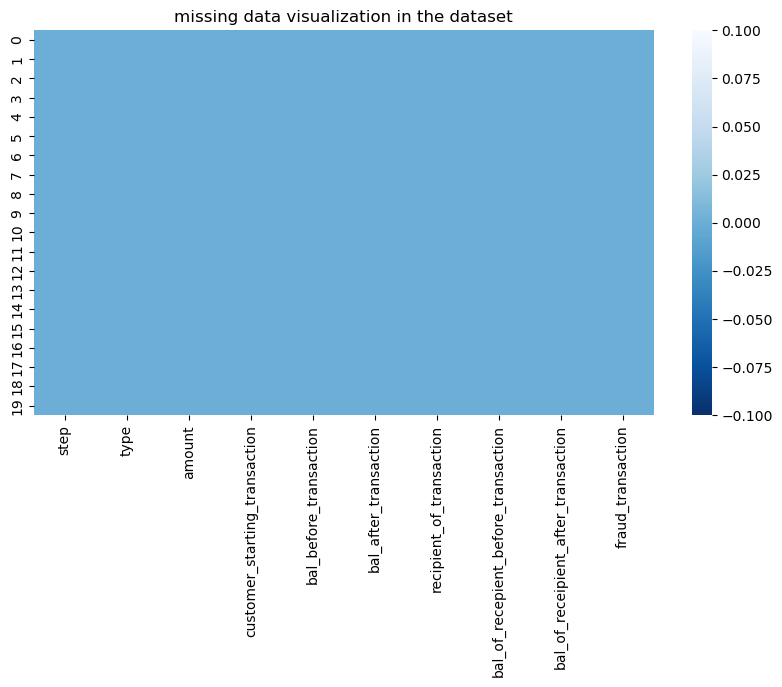

In [27]:

plt.figure(figsize = (10,5))
plt.title ("missing data visualization in the dataset")
sns.heatmap(Fraud_D.isnull(), cbar =True, cmap= "Blues_r")

In [29]:
Fraud_D.shape

(20, 10)

Text(0, 0.5, 'count of online transaction type ')

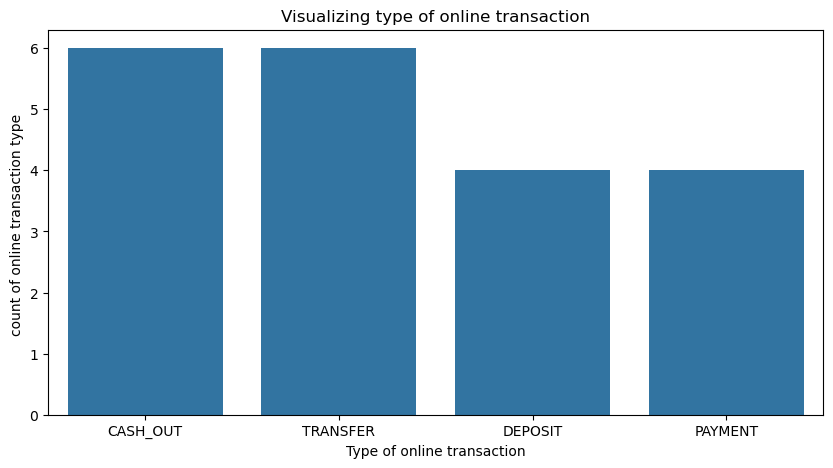

In [37]:
plt.figure(figsize=(10,5))
sns.countplot (x="type", data= Fraud_D)
plt.title ("Visualizing type of online transaction")
plt.xlabel("Type of online transaction")
plt.ylabel("count of online transaction type ")

<Axes: title={'center': 'Fraudulent Transactions'}, ylabel='count'>

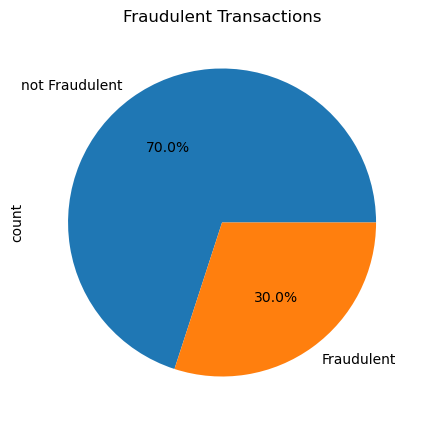

In [39]:
def Fraud (x):
    if x ==1:
        return "Fraudulent"
    else:
        return "not Fraudulent"
    
# create a new column
Fraud_D["fraud_transaction_label"] = Fraud_D["fraud_transaction"].apply(Fraud)


# create visualization
plt.figure(figsize = (10,5))
plt.title ("Fraudulent Transactions")
Fraud_D.fraud_transaction_label.value_counts().plot.pie(autopct='%1.1f%%')

In [41]:
Fraud_D.fraud_transaction_label.value_counts()
1142/1047433*100

0.10902845337124188

<Axes: xlabel='step', ylabel='Density'>

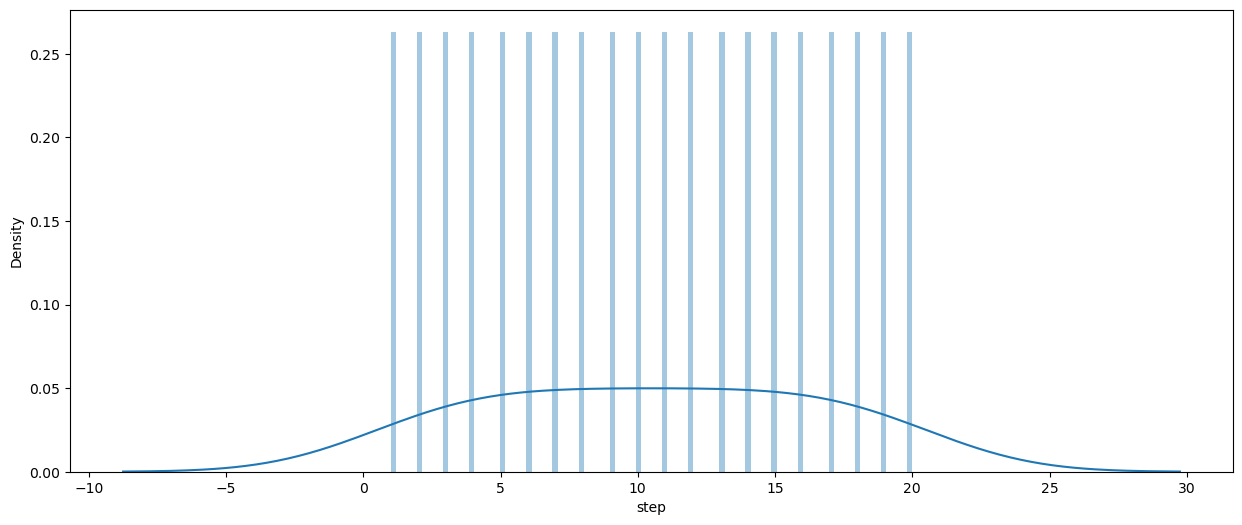

In [43]:
#To disable warnings
import warnings
warnings.filterwarnings("ignore")

# Visualization for step column

plt.figure(figsize=(15,6))
sns.distplot(Fraud_D['step'],bins=100)

<Axes: xlabel='amount', ylabel='Count'>

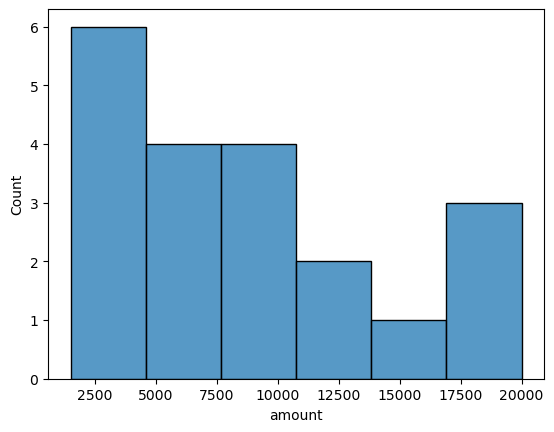

In [45]:
sns.histplot(x= "amount", data =Fraud_D)

In [47]:
Fraud_D.head()


,step,type,amount,customer_starting_transaction,bal_before_transaction,bal_after_transaction,recipient_of_transaction,bal_of_recepient_before_transaction,bal_of_receipient_after_transaction,fraud_transaction,fraud_transaction_label
0,1,CASH_OUT,5000,CUST_001,15000,10000,REC_101,5000,10000,0,not Fraudulent
1,2,TRANSFER,10000,CUST_002,20000,10000,REC_102,8000,18000,1,Fraudulent
2,3,DEPOSIT,7000,CUST_003,5000,12000,REC_103,3000,10000,0,not Fraudulent
3,4,PAYMENT,1500,CUST_004,6000,4500,REC_104,9000,10500,0,not Fraudulent
4,5,CASH_OUT,8000,CUST_005,12000,4000,REC_105,7000,15000,1,Fraudulent


In [49]:
Fraud_D.tail()

,step,type,amount,customer_starting_transaction,bal_before_transaction,bal_after_transaction,recipient_of_transaction,bal_of_recepient_before_transaction,bal_of_receipient_after_transaction,fraud_transaction,fraud_transaction_label
15,16,TRANSFER,9000,CUST_016,15000,6000,REC_1016,4000,13000,0,not Fraudulent
16,17,PAYMENT,2500,CUST_017,8000,5500,REC_1017,9000,11500,0,not Fraudulent
17,18,CASH_OUT,11000,CUST_018,13000,2000,REC_1018,4000,15000,1,Fraudulent
18,19,DEPOSIT,5000,CUST_019,4000,9000,REC_1019,3000,8000,0,not Fraudulent
19,20,TRANSFER,20000,CUST_020,30000,10000,REC_1020,5000,25000,1,Fraudulent


<Axes: xlabel='type', ylabel='amount'>

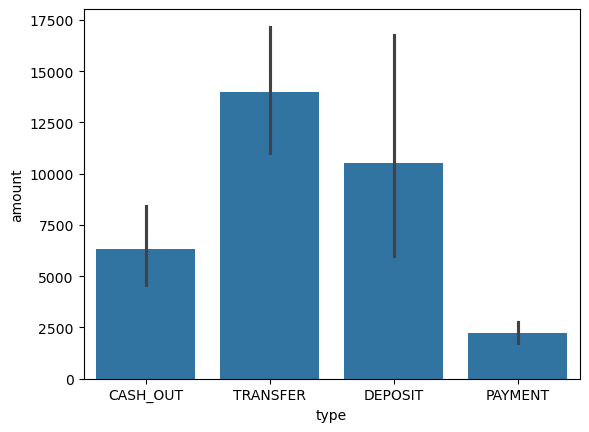

In [51]:
sns.barplot(x='type',y='amount',data=Fraud_D)

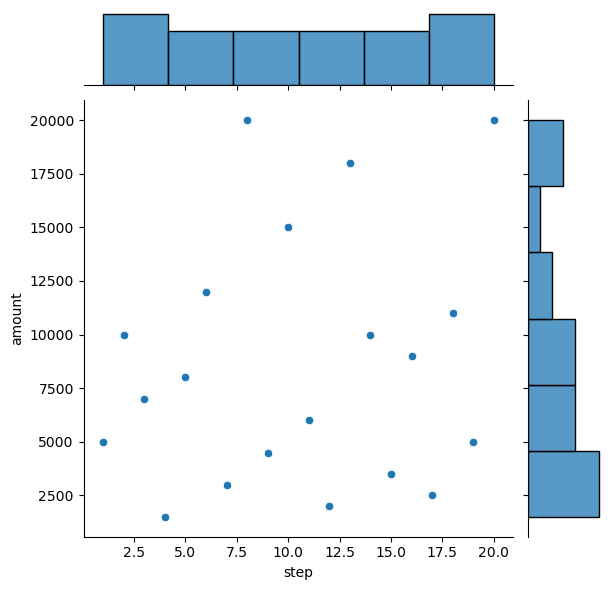

In [53]:
sns.jointplot(x='step',y='amount',data=Fraud_D)

<Axes: xlabel='amount', ylabel='step'>

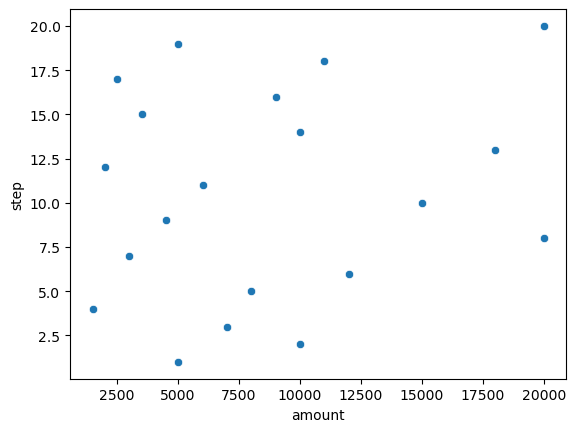

In [55]:
sns.scatterplot(x=Fraud_D["amount"], y=Fraud_D["step"])

Text(0, 0.5, 'fraud_transaction_label')

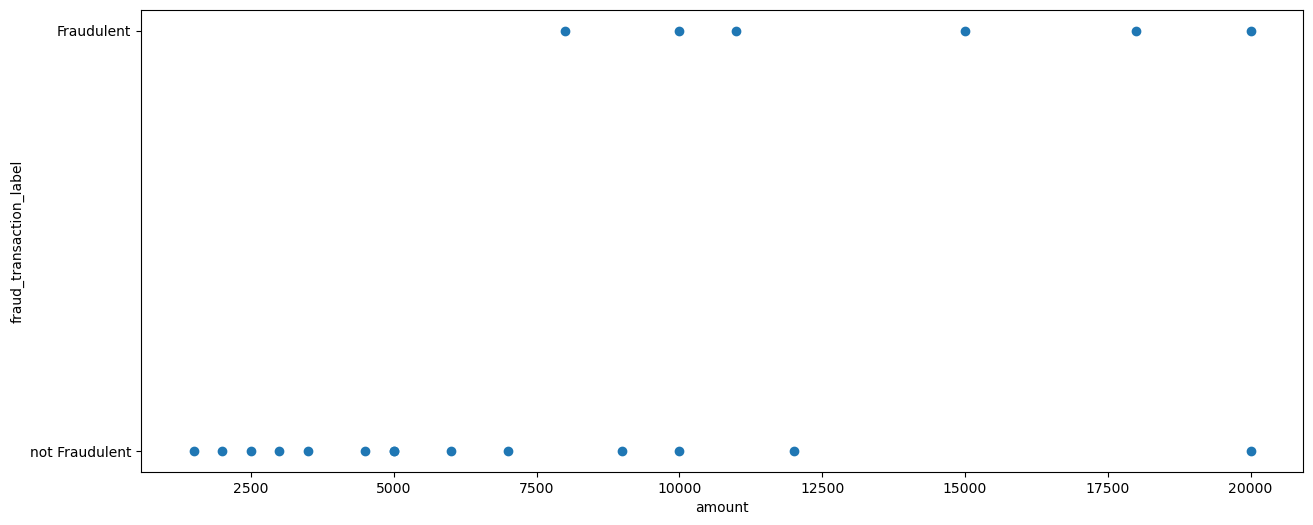

In [57]:
plt.figure(figsize=(15,6))
plt.scatter(x='amount',y='fraud_transaction_label',data=Fraud_D)
plt.xlabel('amount')
plt.ylabel('fraud_transaction_label')

Text(0, 0.5, 'fraud_transaction_label')

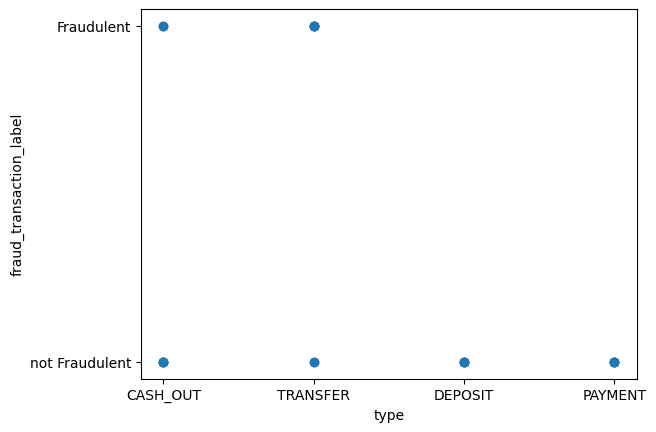

In [59]:

plt.scatter(x='type',y='fraud_transaction_label',data=Fraud_D)
plt.xlabel('type')
plt.ylabel('fraud_transaction_label')

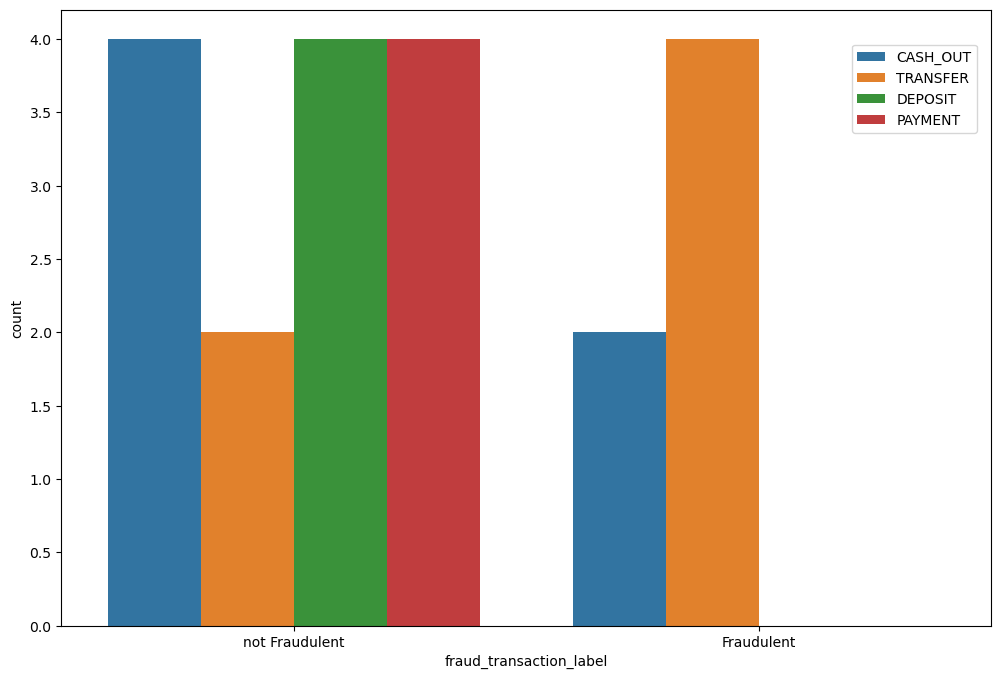

In [61]:
plt.figure(figsize=(12,8))
sns.countplot(x='fraud_transaction_label',data=Fraud_D,hue='type')
plt.legend(loc=[0.85,0.8])

<Axes: xlabel='type', ylabel='step'>

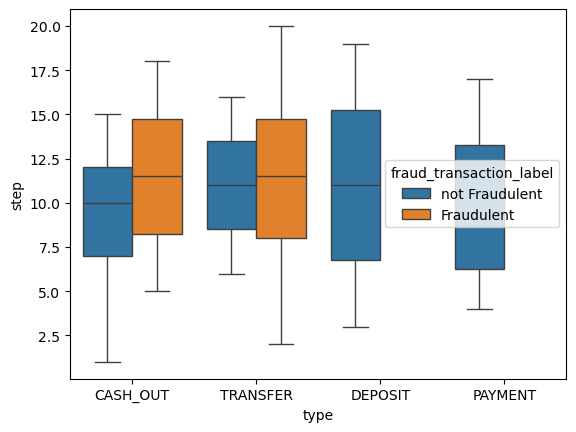

In [63]:
sns.boxplot(x= "type", y= "step", hue ="fraud_transaction_label", data= Fraud_D)

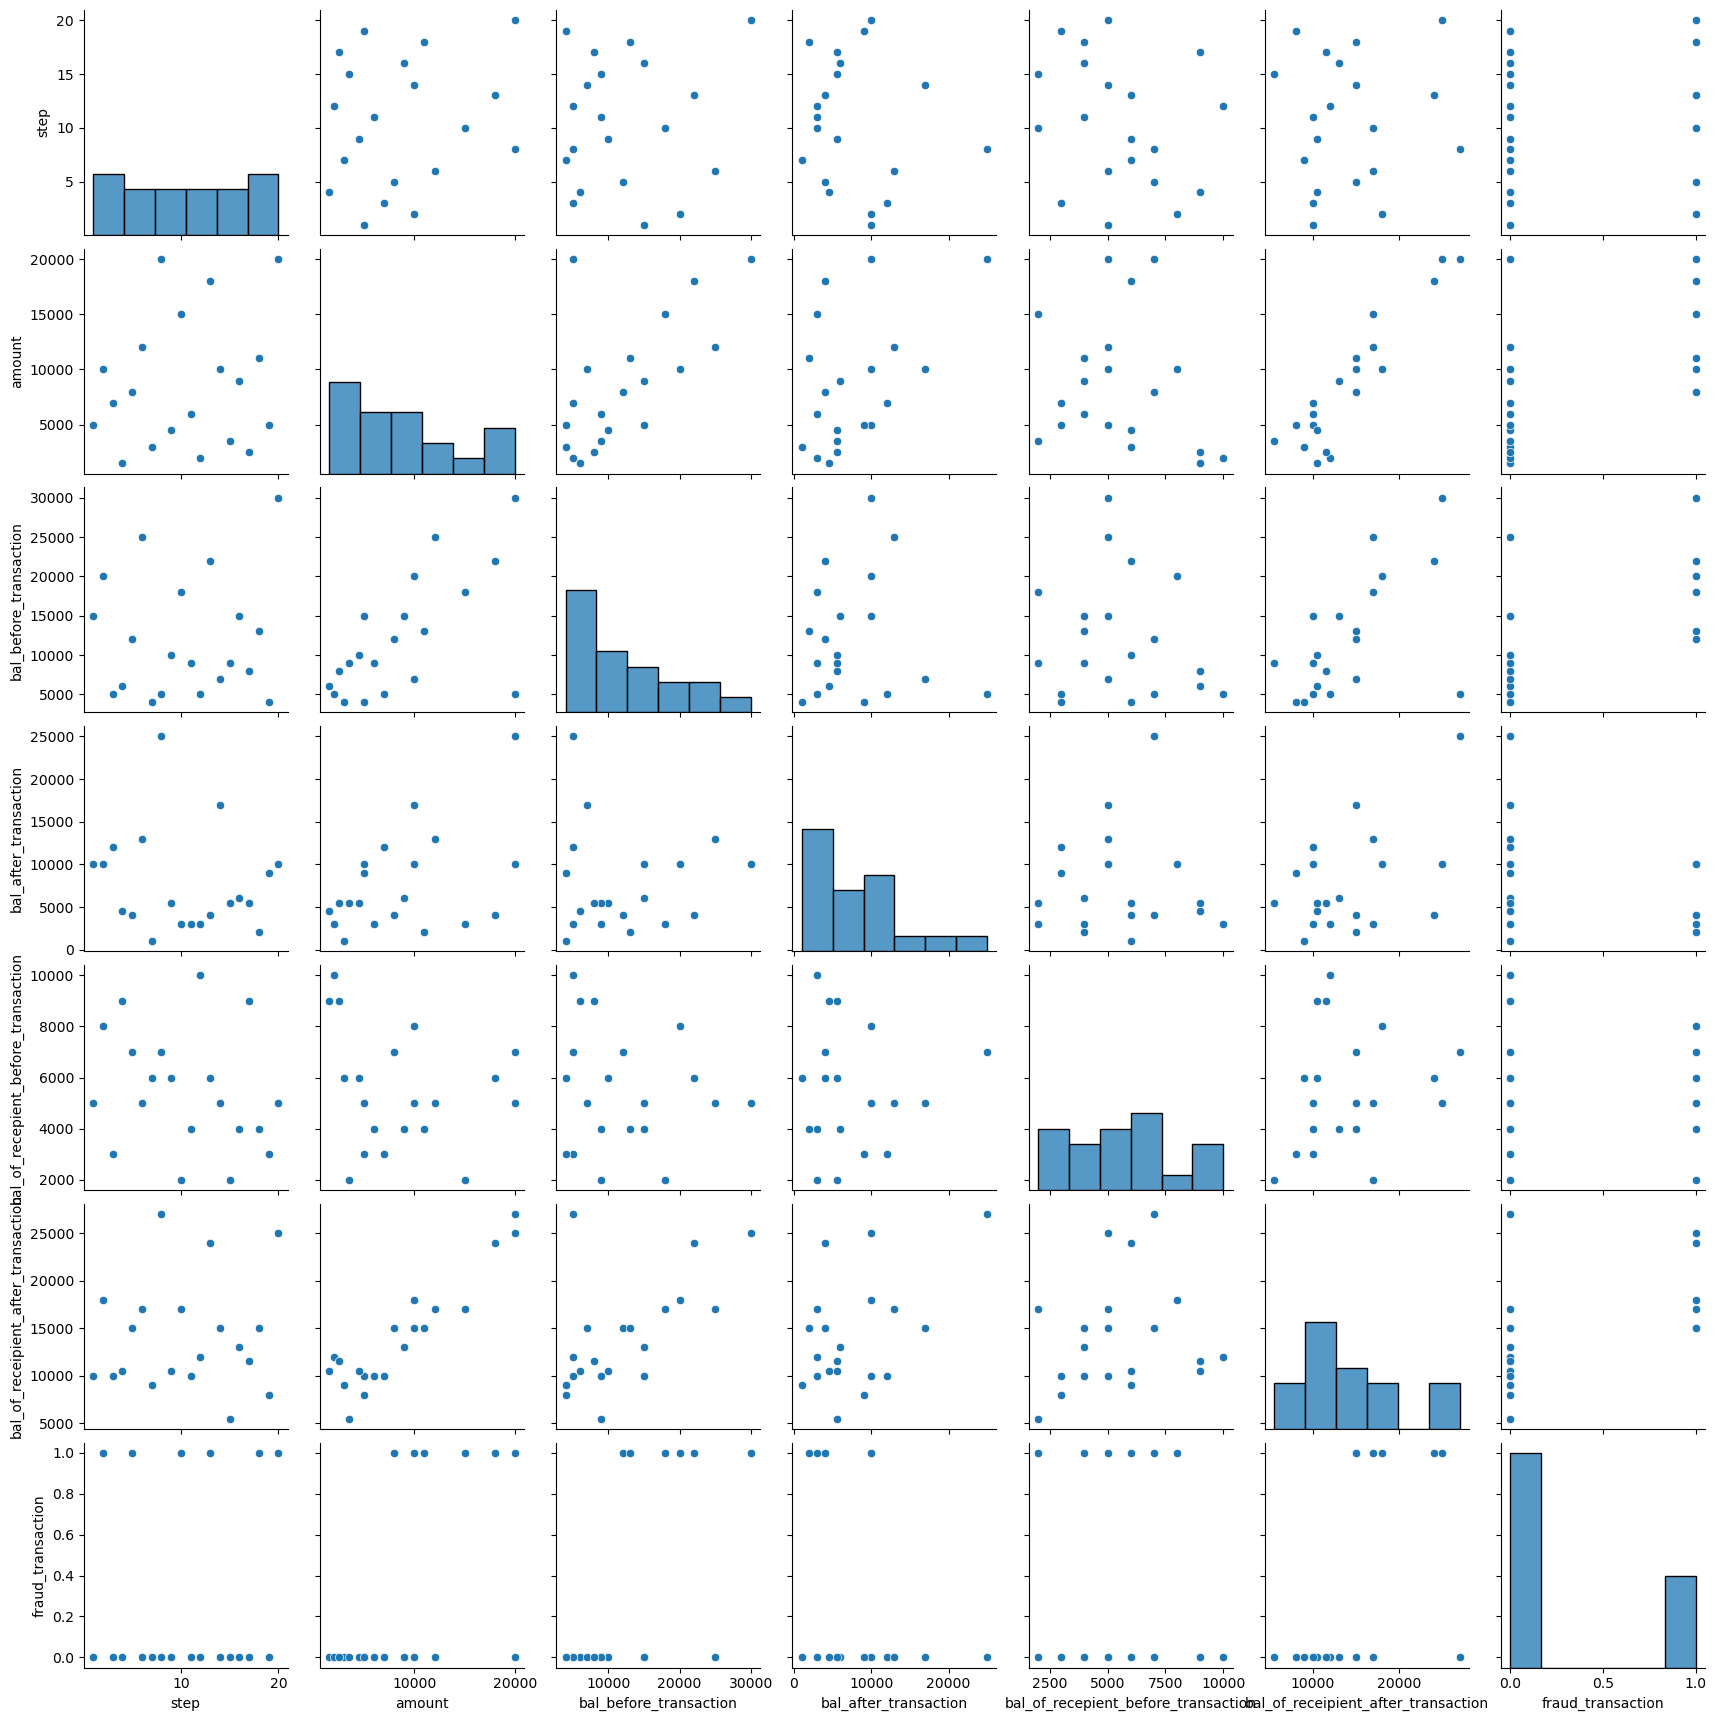

In [65]:
sns.pairplot(Fraud_D)

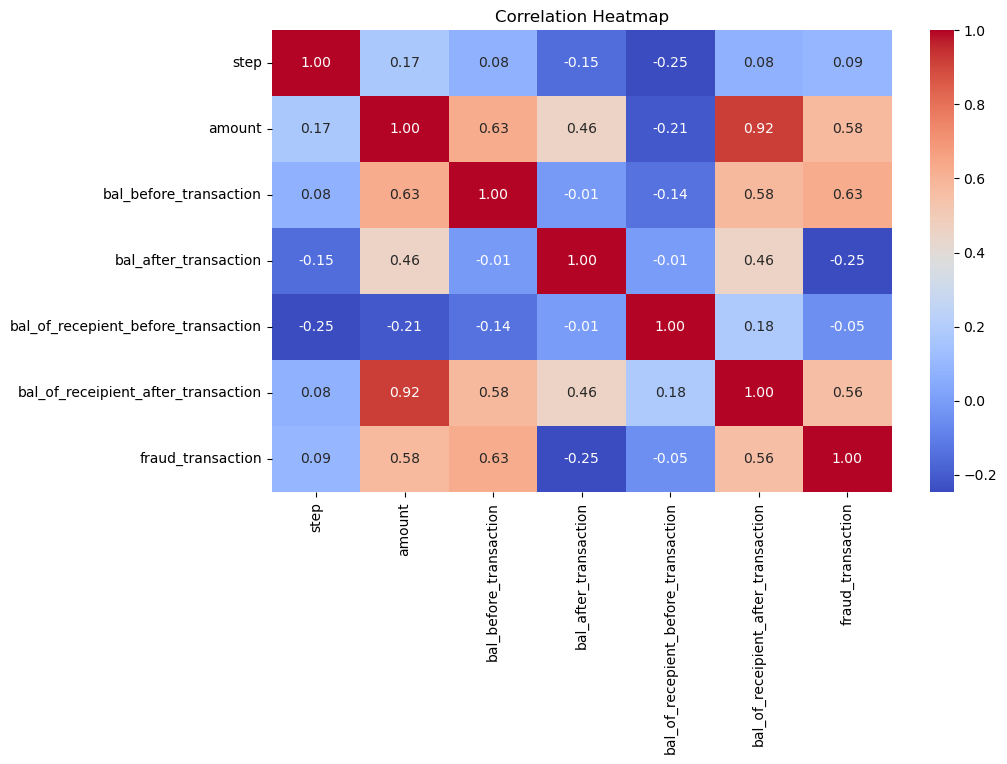

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns
numeric_fraud_D = Fraud_D.select_dtypes(include=['number'])

# Compute correlation
corel = numeric_fraud_D.corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corel, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()



In [74]:
categorical = ['type']
categories_dummies = pd.get_dummies(Fraud_D[categorical])

#view what you have done
categories_dummies.head()

,type_CASH_OUT,type_DEPOSIT,type_PAYMENT,type_TRANSFER
0,True,False,False,False
1,False,False,False,True
2,False,True,False,False
3,False,False,True,False
4,True,False,False,False


In [76]:
Fraud_D = pd.concat([Fraud_D,categories_dummies], axis=1)

#check what you have done
print(Fraud_D.shape)
Fraud_D.head()

(20, 15)


,step,type,amount,customer_starting_transaction,bal_before_transaction,bal_after_transaction,recipient_of_transaction,bal_of_recepient_before_transaction,bal_of_receipient_after_transaction,fraud_transaction,fraud_transaction_label,type_CASH_OUT,type_DEPOSIT,type_PAYMENT,type_TRANSFER
0,1,CASH_OUT,5000,CUST_001,15000,10000,REC_101,5000,10000,0,not Fraudulent,True,False,False,False
1,2,TRANSFER,10000,CUST_002,20000,10000,REC_102,8000,18000,1,Fraudulent,False,False,False,True
2,3,DEPOSIT,7000,CUST_003,5000,12000,REC_103,3000,10000,0,not Fraudulent,False,True,False,False
3,4,PAYMENT,1500,CUST_004,6000,4500,REC_104,9000,10500,0,not Fraudulent,False,False,True,False
4,5,CASH_OUT,8000,CUST_005,12000,4000,REC_105,7000,15000,1,Fraudulent,True,False,False,False


In [85]:
categorical = ['type', 'customer_starting_transaction', 'recipient_of_transaction']
Fraud_D = Fraud_D.drop(columns=[col for col in categorical if col in Fraud_D.columns])

# Drop additional columns if they exist
Fraud_D.drop(columns=['fraud_transaction_label'], inplace=True, errors='ignore')

# Display updated DataFrame
print(Fraud_D.head())


   step  amount  bal_before_transaction  bal_before_transaction.1  \
0     1    5000                   15000                     10000   
1     2   10000                   20000                     10000   
2     3    7000                    5000                     12000   
3     4    1500                    6000                      4500   
4     5    8000                   12000                      4000   

   bal_of_recepient_before_transaction  bal_of_receipient_after_transaction  \
0                                 5000                                10000   
1                                 8000                                18000   
2                                 3000                                10000   
3                                 9000                                10500   
4                                 7000                                15000   

   fraud_transaction  
0                  0  
1                  1  
2                  0  
3                 